In [1]:
import importlib
import tensorflow as tf
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline


from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3

from base import EnsembleNetwork
from networks import DropoutNetwork, NlpdNetwork, LrNetwork

# Linear

In [2]:
num_meta_epochs = 3#100#100#10
num_epochs = 5#15#0#50#15#5#25#50
seed = 50#42#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}

learning_rate = None#1/num_epochs
num_neurons = [10, 10, 10]
num_neurons_nonlinear = [10,10,10,10,5]
activations = [tf.nn.leaky_relu]*len(num_neurons)
activations_nonlinear = [tf.nn.leaky_relu]*len(num_neurons_nonlinear)

model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,'activations':activations,'num_neurons':num_neurons,'learning_rate':learning_rate}#{'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}



experiment started at 2018-08-09 10:15:22.745120
experiment number 1 took 11.305641889572144 seconds. That means the whole run will probably take 33.91692566871643 more seconds and 0.5652820944786072 more minutes.
overall, it took 30.395491123199463 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.224400  0.372222 -5.626982  0.010149
std    0.203910  0.082215  4.178518  0.005773
min    0.096593  0.316667 -8.644412  0.004973
25%    0.106821  0.325000 -8.011626  0.007036
50%    0.117050  0.333333 -7.378841  0.009099
75%    0.288304  0.400000 -4.118267  0.012736
max    0.459559  0.466667 -0.857692  0.016374
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.224400 &  0.372222 & -5.626982 &  0.010149 \\
std   &  0.203910 &  0.082215 &  4.178518 &  0.005773 \\
min   &  0.096593 &  0.316667 & -8.644412 &

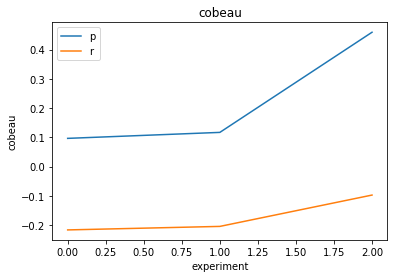

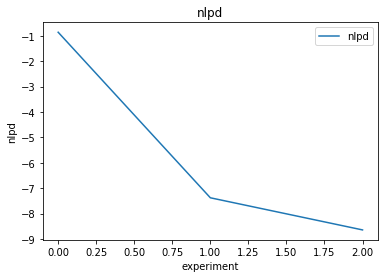

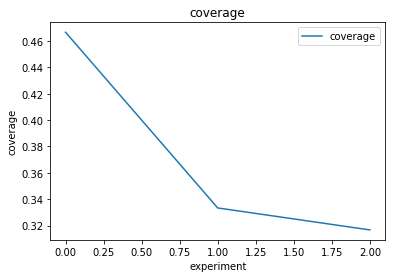

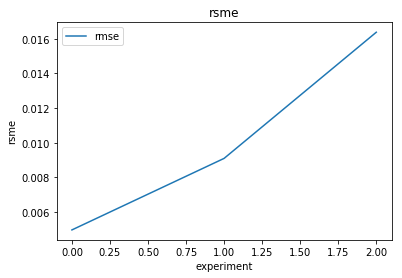

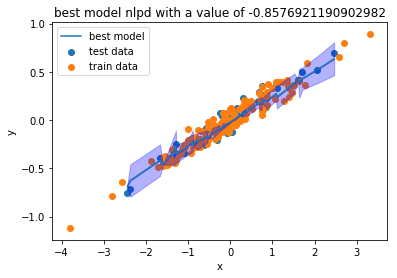

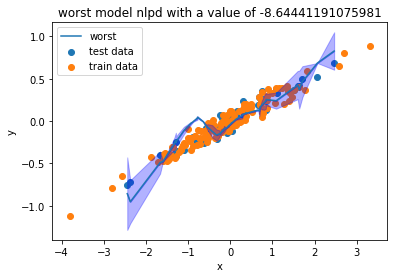

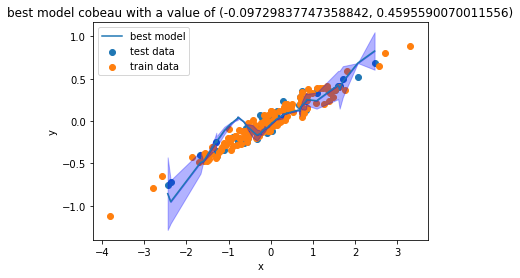

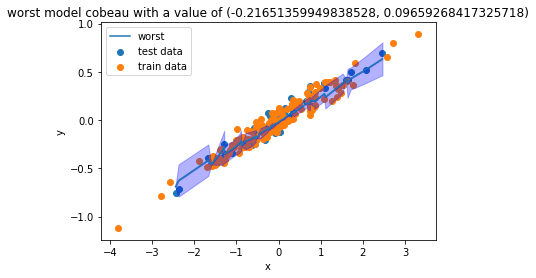

In [3]:
pd = repeat_experiment(DropoutNetwork, dataset_creation.LinearDataset,
                       num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 10:15:57.427758
experiment number 1 took 10.770607709884644 seconds. That means the whole run will probably take 32.31182312965393 more seconds and 0.5385303854942322 more minutes.
overall, it took 31.10505485534668 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   9.791013e-02  0.150000  1.029768  0.015543
std    1.227647e-01  0.148137  0.882075  0.010072
min    1.830288e-10  0.033333  0.011858  0.006603
25%    2.904404e-02  0.066667  0.759866  0.010087
50%    5.808809e-02  0.100000  1.507873  0.013570
75%    1.468652e-01  0.208333  1.538723  0.020012
max    2.356423e-01  0.316667  1.569572  0.026455
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  9.791013e-02 &  0.150000 &  1.029768 &  0.015543 \\
std   &  1.227647e-01 &  0.148137 &  0.882075 &  0.01

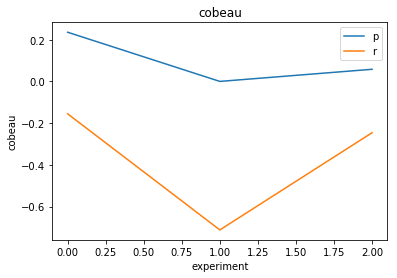

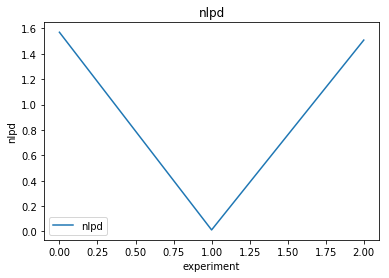

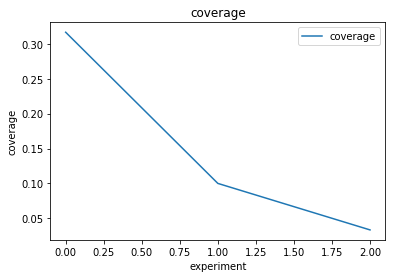

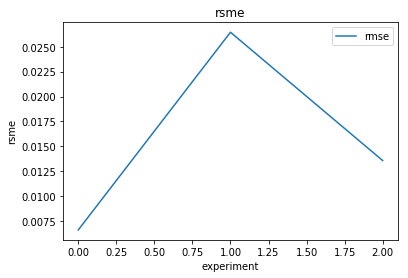

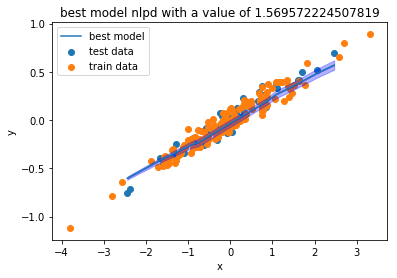

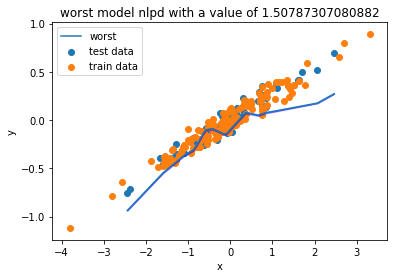

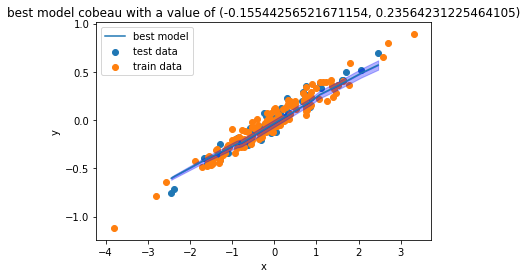

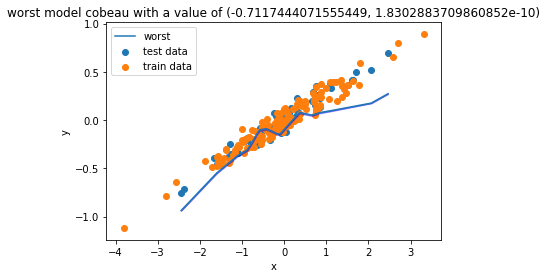

In [4]:
pd1 = repeat_experiment(NlpdNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 10:16:32.822531
experiment number 1 took 9.23855185508728 seconds. That means the whole run will probably take 27.71565556526184 more seconds and 0.461927592754364 more minutes.
overall, it took 29.795035123825073 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.330929  0.072222  1.810411  0.006141
std    0.344506  0.009623  0.088377  0.001159
min    0.019759  0.066667  1.738652  0.004803
25%    0.145823  0.066667  1.761052  0.005792
50%    0.271887  0.066667  1.783452  0.006781
75%    0.486514  0.075000  1.846290  0.006809
max    0.701140  0.083333  1.909128  0.006837
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.330929 &  0.072222 &  1.810411 &  0.006141 \\
std   &  0.344506 &  0.009623 &  0.088377 &  0.001159 \\
min   &  0.019759 &  0.066667 &  1.738652 &  0

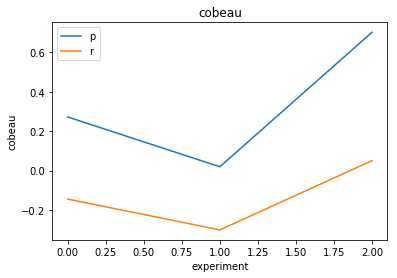

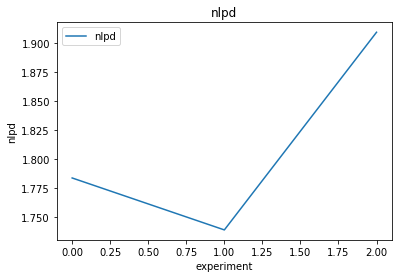

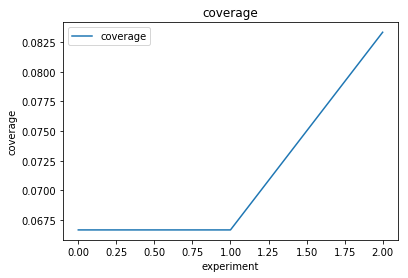

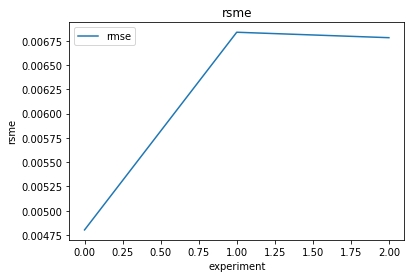

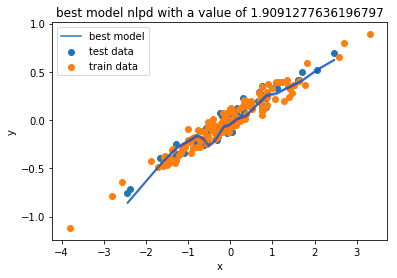

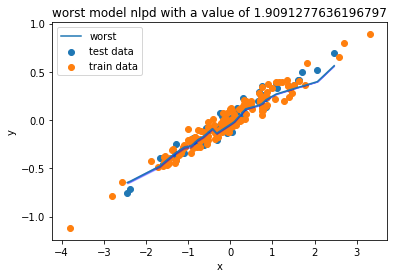

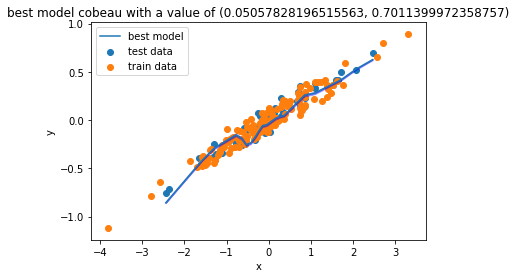

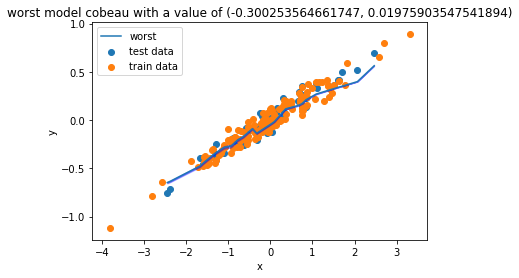

In [5]:
pd2 = repeat_experiment(LrNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 5#10
#num_epochs = 10#15#50 #10
seed = 42+42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}#[5,5,5]}#

dataset_params = {'num_samples':num_samples,'seed':seed}

learning_rate = None#1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,
                'activations':activations_nonlinear
               }#{'num_epochs':num_epochs,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-09 10:17:08.771783
experiment number 1 took 4.754117965698242 seconds. That means the whole run will probably take 14.262353897094727 more seconds and 0.23770589828491212 more minutes.
overall, it took 15.833274841308594 seconds with 3 experiments
         cobeau  coverage        nlpd      rsme
count  3.000000  3.000000    3.000000  3.000000
mean   0.336238  0.050000 -341.052332  0.558544
std    0.539569  0.016667  167.073069  0.204331
min    0.024442  0.033333 -438.412457  0.332567
25%    0.024718  0.041667 -437.510608  0.472672
50%    0.024995  0.050000 -436.608759  0.612777
75%    0.492137  0.058333 -292.372270  0.671532
max    0.959278  0.066667 -148.135780  0.730287
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &        nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &    3.000000 &  3.000000 \\
mean  &  0.336238 &  0.050000 & -341.052332 &  0.558544 \\
std   &  0.539569 &  0.016667 &  167.073069 &  0.204331 \\
min   &  0.02444

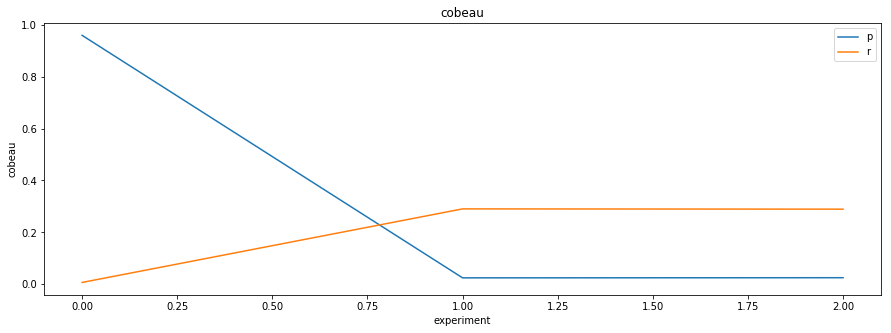

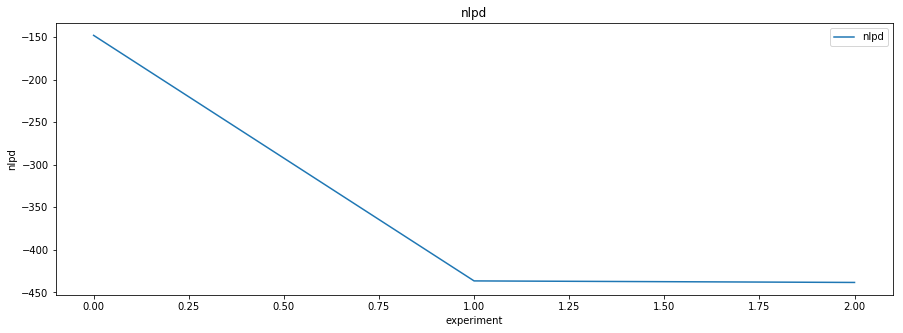

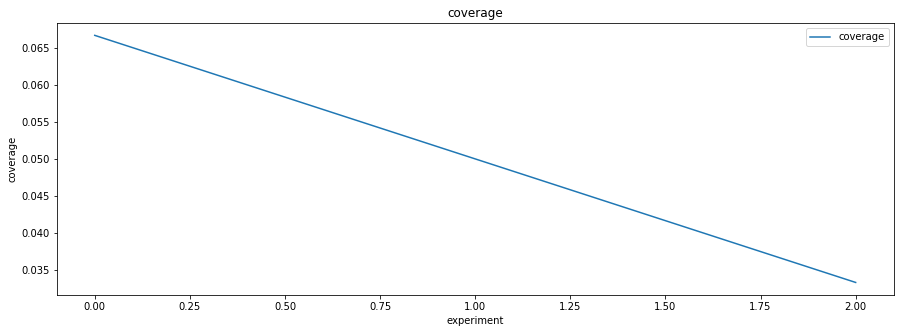

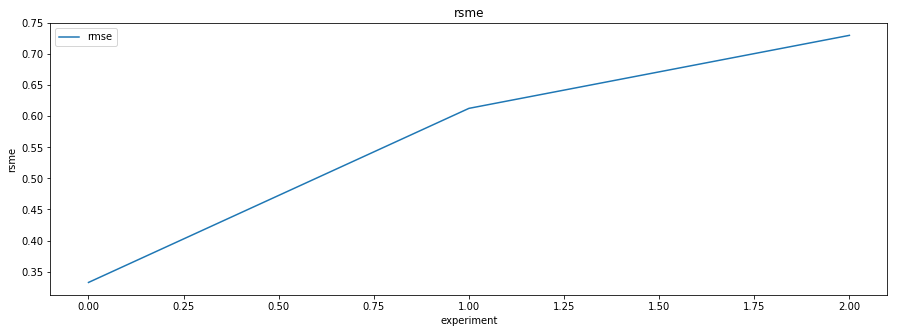

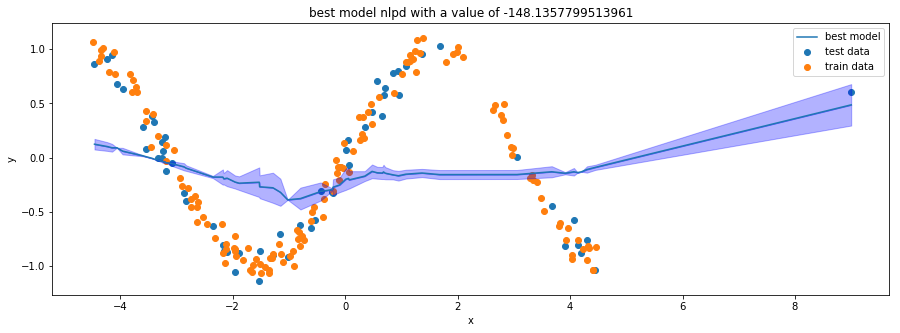

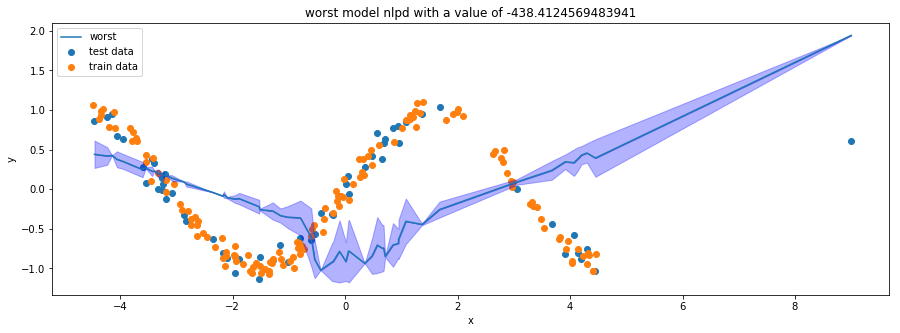

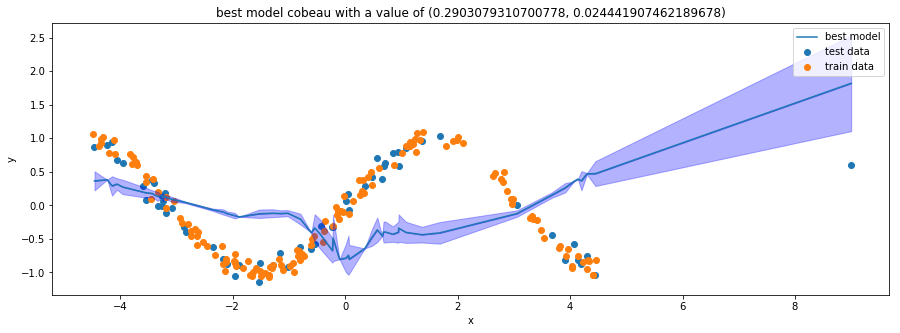

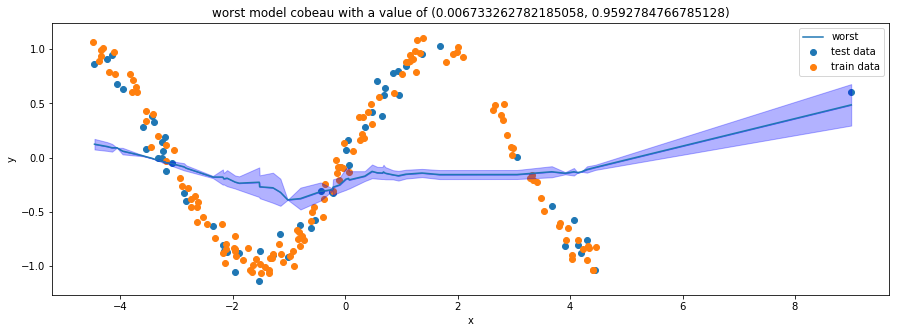

In [7]:
pd11 = repeat_experiment(DropoutNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

In [ ]:
pd22 = repeat_experiment(NlpdNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 10:17:32.263738
experiment number 1 took 4.826767206192017 seconds. That means the whole run will probably take 14.48030161857605 more seconds and 0.24133836030960082 more minutes.


In [ ]:
pd33 = repeat_experiment(LrNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# X3

In [ ]:
importlib.reload(dataset_creation)

dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


In [ ]:


pd111 = repeat_experiment(DropoutNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,
                          model_params=model_params,dataset_params=dataset_params)

In [ ]:
pd222 = repeat_experiment(NlpdNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

In [ ]:
pd333 = repeat_experiment(LrNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)